## Convolutional Neural Network 



In this notebook you will learn to distinguish dogs from cats!

Data:
https://drive.google.com/drive/folders/1nzVk4GOvKR6P87uPszUkKMPtaXV_wrZf?usp=sharing

Fill all the necessary gaps in cells below and fit neural networks for solving the binary classification task.

## Task 1:

1. Build and fit CNN with 3 convolutional layers for binary classification
2. Evaluate accuracy on test data
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)

First, let's load all the necessary functions:


In [1]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras.applications import VGG16, InceptionResNetV2
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

Using TensorFlow backend.
C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type

The images collected for training and testing the deep learning model must be prepared: split the entire set into a training, validation and test sample, observing the balancing of classes (with binary classification they should be approximately equal in all three samples).

This has _already_ been done: in the Cats_and_Dogs directory there are three subdirectories: train, test and val - training, test and validation samples, respectively.

In [2]:
# if you are using google colab for this task you can mount your GoogleDrive as follows: 
#from google.colab import drive
#drive.mount('/content/drive/')

# After running this cell you should enter the authorization code from your Google account
devices = ['cpu', 'gpu']
tf.device(devices[1])

In [3]:
# Initialize the folders with train, test and validation datasets (in "/My Drive/..." or from your local repository where you have downloaded data):

train = './train'
val =   './val'
test =  './test'

# The shape of the RGB image
img_width, img_height, channels = 150, 150, 3 # you can try different sizes

# input shape
input_shape = (img_width, img_height, 3)
# position matters!
# Number_of_channels can be at the first or the last position
# in our case - "channels last"

# minibatch size
batch_size = 64
# train set size
nb_train_samples = 20000
# validation set size 
nb_validation_samples = 2490
# test set size
nb_test_samples = 2500

## Prepare the data.

You don’t have to manually change the shapes of 25000 images and convert them into the necessary format for keras (img_width, img_height, 3).

We will use the built-in image preprocessing function _ImageGenerator()_.

It performs scaling, resizes selected images and prepares batches (mini-samples) to train the model.

In [4]:
datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = datagen.flow_from_directory(
    train,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

val_generator = datagen.flow_from_directory(
    val,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

test_generator = datagen.flow_from_directory(
    test,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 2490 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


Set the network architecture by sequentially adding layers to it:
1. A convolutional layer with 16 neurons, filter size 3x3. Activation function - 'relu'
2. MaxPooling layer with filter size 2x2.
3. A convolutional layer with 32 neurons, filter size 3x3. Activation function - 'relu'
4. MaxPooling layer with filter size 2x2.
5. A convolutional layer with 64 neurons, filter size 3x3. Activation function - 'relu'
6. MaxPooling layer with filter size 2x2.
7. Operation model.add (Flatten ()), which makes a one-dimensional vector of the resulting feature maps.
8. A fully connected layer with 64 neurons. Activation function - 'relu'
9. Use model.add (Dropout (0.5)) which excludes the edge from the current layer in the computational graph with a 50% probability to avoid overfitting.
10. A fully connected layer with 1 neuron. Activation function - 'sigmoid', because binary classification model.

Add to the model all the missing layers, by analogy with the already specified.
Keras documentation: https://keras.io/layers/about-keras-layers/

In [5]:
model = Sequential()

# 1: +Convolutional
# For example:
model.add(Conv2D(16, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))

# 2: +Pooling
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid"))
# 3: 
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
#     +Relu
model.add(Activation('relu'))

# 4:  +Pooling
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid"))
# 5:  +Convolutional
model.add(Conv2D(64, (3, 3), input_shape=(150, 150, 3)))

#     +Relu
model.add(Activation('relu'))
# 6:  +Pooling 
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid"))
# 7:  +Flattening
model.add(Flatten())
# 8:  +Dense
model.add(Dense(64))
#     +ReLu
model.add(Activation('relu'))
# 9:  +Dropout
model.add(Dropout(0.5))
# 10: +Dense
model.add(Dense(1))
#     +Sigmoid
model.add(Activation('sigmoid'))


In [7]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [8]:
# use the generator to train the model (analogue of the fit method)
# 1 epoch of training on a CPU will take 4-6 minutes. The GPU is an ~order of magnitude faster.
# THE FIRST EPOCH USUALLY TAKES MUCH LARGER TIME AS KERAS SHOULD BUILD THE COMPUTATIONAL GRAPH

history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=20, # try different number of epochs: 10, 15, 20; check the loss and accuracy;
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)


Epoch 1/20
312/312 [==============================] - 44s 140ms/step - loss: 0.6167 - accuracy: 0.6504 - val_loss: 0.6368 - val_accuracy: 0.7336
Epoch 2/20
312/312 [==============================] - 45s 145ms/step - loss: 0.5163 - accuracy: 0.7463 - val_loss: 0.3587 - val_accuracy: 0.7852
Epoch 3/20
312/312 [==============================] - 44s 142ms/step - loss: 0.4547 - accuracy: 0.7886 - val_loss: 0.3609 - val_accuracy: 0.8042
Epoch 4/20
312/312 [==============================] - 44s 142ms/step - loss: 0.3960 - accuracy: 0.8256 - val_loss: 0.3780 - val_accuracy: 0.8100
Epoch 5/20
312/312 [==============================] - 44s 141ms/step - loss: 0.3619 - accuracy: 0.8435 - val_loss: 0.4118 - val_accuracy: 0.8372
Epoch 6/20
312/312 [==============================] - 44s 142ms/step - loss: 0.3163 - accuracy: 0.8662 - val_loss: 0.5088 - val_accuracy: 0.8364
Epoch 7/20
312/312 [==============================] - 44s 141ms/step - loss: 0.2780 - accuracy: 0.8819 - val_loss: 0.5072 - val_a

In [ ]:
print(history.history)

In [9]:
# NOTE: if the accuracy on test data after 15 epochs is less than 80% smth goes wrong

scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

Accuracy on test data: 84.74%


Plot the graphs: 

- Loss(Number of epochs)

- Accuracy(Number of epochs)

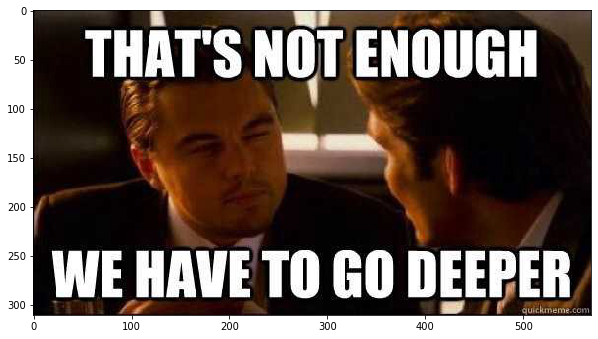

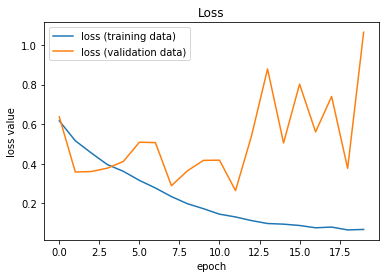

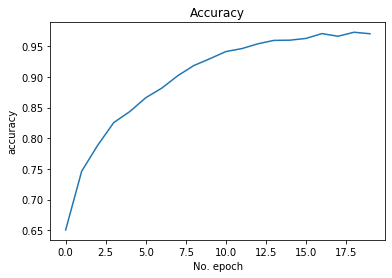

In [10]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
img = mpimg.imread('./Deeper.jpeg')
plt.figure(figsize = (10,20))
plt.imshow(img)
plt.show()

plt.plot(history.history['loss'], label='loss (training data)')
plt.plot(history.history['val_loss'], label='loss (validation data)')
plt.title('Loss')
plt.ylabel('loss value')
plt.xlabel('epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('No. epoch')
plt.show()


In [ ]:
from keras.preprocessing.image import load_img, img_to_array

# load an image from file
image = load_img('./personal/dog_1.jpg', target_size=(150, 150))
image = img_to_array(image)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
yhat = model.predict(image)
print(yhat)



Let's try to improve the quality of recognition, using the method of transfer lerning. 

We will use weights of deep neural networks already trained on large dataset such as  ImageNet, and provide fine tuning of several additional dense layers on new data relevant to the current classification task. The more new images will differ from those on which the network has been trained, the more layers will need to be “retrained” in order to get good classification accuracy. The intuition here is that the model has already learned how to highlight the necessary features on the images in the large dataset, it only needs to be “tweaked” for a specific task.

## Task 2

1. Build and fit Transfer Learning model using pre-trained VGG16-model weights from keras application.
2. Do the same with **another avaliable pre-trained deep learning model** from keras application https://keras.io/api/applications/.
2. Evaluate accuracy on test data for p.1 and p.2
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)
4. Check the performance of your model with the custom image of cat or dog (so the model will tell which class this image belongs to). Develop the function for the inference of the best algorithm.

In [11]:
# First, download the weights of the VGG16 network trained on the ImageNet dataset:

vgg16_net = VGG16(weights='imagenet', 
                  include_top=False,      # we take only the "convolution" part, the last layers we add ourselves
                  input_shape=(150, 150, 3))
vgg16_net.trainable = False               # clearly prescribe that we do NOT overload the network.
                                          # Weights VGG16 in the process of learning will remain unchanged!

vgg16_net.summary()                       # pay attention to the number of trained and untrained parameters

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

We construct our model of "transfer learning" by adding two fully connected layers to VGG16

In [12]:
# add layers to VGG16:

model_vgg = Sequential()
model_vgg.add(vgg16_net)

# + flattening
model_vgg.add(Flatten())
# + Dense fullyconnected layer with 256 neurons
model_vgg.add(Dense(256))
# + ReLu
model_vgg.add(Activation('relu'))
# + Dropout
model_vgg.add(Dropout(0.5))
# + Dense layer with 1 neuron
model_vgg.add(Dense(1))
# + sigmoid
model_vgg.add(Activation('sigmoid'))


model_vgg.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               2097408   
_________________________________________________________________
activation_6 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
_________________________________________________________________
activation_7 (Activation)    (None, 1)                

In [13]:
model_vgg.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=1e-5), 
              metrics=['accuracy'])

E.g., it was like:


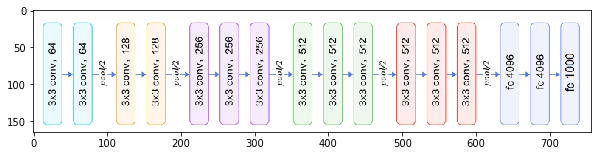

In [14]:
img = mpimg.imread('./VGG16.png')
plt.figure(figsize = (10,20))
plt.imshow(img)
plt.show()

and it becomes:

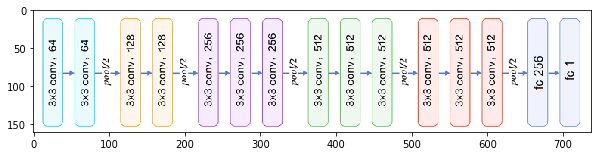

In [15]:
img = mpimg.imread('./VGG162.png')
plt.figure(figsize = (10,20))
plt.imshow(img)
plt.show()

In [16]:
# We also use the generator to train the model (similar to the fit method)
# Without using a GPU, learning 1 epoch of such a network will take about an hour. Plan your time =)
# If you have access to a GPU, you can try 10-12 epochs - the quality should increase even more.

history = model_vgg.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/10
312/312 [==============================] - 48s 153ms/step - loss: 0.5094 - accuracy: 0.7424 - val_loss: 0.4069 - val_accuracy: 0.8565
Epoch 2/10
312/312 [==============================] - 49s 157ms/step - loss: 0.3454 - accuracy: 0.8502 - val_loss: 0.3378 - val_accuracy: 0.8792
Epoch 3/10
312/312 [==============================] - 47s 151ms/step - loss: 0.2993 - accuracy: 0.8702 - val_loss: 0.3224 - val_accuracy: 0.8945
Epoch 4/10
312/312 [==============================] - 47s 151ms/step - loss: 0.2751 - accuracy: 0.8830 - val_loss: 0.2245 - val_accuracy: 0.9019
Epoch 5/10
312/312 [==============================] - 48s 155ms/step - loss: 0.2582 - accuracy: 0.8917 - val_loss: 0.1949 - val_accuracy: 0.9027
Epoch 6/10
312/312 [==============================] - 48s 152ms/step - loss: 0.2474 - accuracy: 0.8958 - val_loss: 0.1838 - val_accuracy: 0.9031
Epoch 7/10
312/312 [==============================] - 47s 151ms/step - loss: 0.2377 - accuracy: 0.9002 - val_loss: 0.1162 - val_ac

In [17]:
scores = model_vgg.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

Accuracy on test data: 89.86%


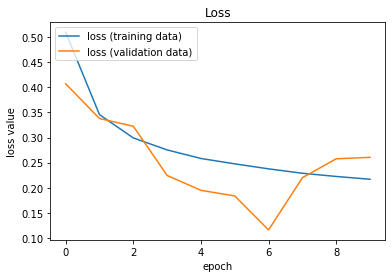

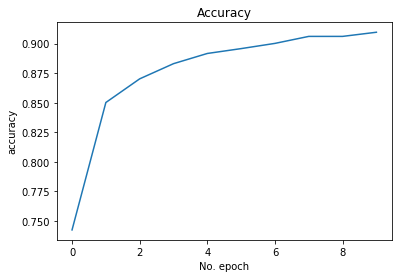

In [18]:
plt.plot(history.history['loss'], label='loss (training data)')
plt.plot(history.history['val_loss'], label='loss (validation data)')
plt.title('Loss')
plt.ylabel('loss value')
plt.xlabel('epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('No. epoch')
plt.show()

### Second pre-trained InceptionResNetV2

In [19]:
res_net = InceptionResNetV2(weights='imagenet', 
                  include_top=False,      # we take only the "convolution" part, the last layers we add ourselves
                  input_shape=(150, 150, 3))
res_net.trainable = False               # clearly prescribe that we do NOT overload the network.
                                          # Weights Res in the process of learning will remain unchanged!

res_net.summary()                       # pay attention to the number of trained and untrained 


Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 74, 74, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 74, 74, 32)   96          conv2d_4[0][0]                   
__________________________________________________________________________________________________
activation_8 (Activation)       (None, 74, 74, 32)   0           batch_normalization_1[0][0]      
_______________________________________________________________________________

In [20]:
model_res = Sequential()
model_res.add(res_net)

# + flattening
model_res.add(Flatten())
# + Dense fullyconnected layer with 256 neurons
model_res.add(Dense(256))
# + ReLu
model_res.add(Activation('relu'))
# + Dropout
model_res.add(Dropout(0.5))
# + Dense layer with 1 neuron
model_res.add(Dense(1))
# + sigmoid
model_res.add(Activation('sigmoid'))

model_res.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Model)  (None, 3, 3, 1536)        54336736  
_________________________________________________________________
flatten_3 (Flatten)          (None, 13824)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               3539200   
_________________________________________________________________
activation_211 (Activation)  (None, 256)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 257       
_________________________________________________________________
activation_212 (Activation)  (None, 1)                

In [21]:
model_res.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=1e-5), 
              metrics=['accuracy'])

In [22]:
history = model_res.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/10
312/312 [==============================] - 55s 177ms/step - loss: 0.4489 - accuracy: 0.7696 - val_loss: 0.3611 - val_accuracy: 0.9593
Epoch 2/10
312/312 [==============================] - 51s 164ms/step - loss: 0.3198 - accuracy: 0.8576 - val_loss: 0.0320 - val_accuracy: 0.9592
Epoch 3/10
312/312 [==============================] - 52s 165ms/step - loss: 0.2822 - accuracy: 0.8781 - val_loss: 0.1866 - val_accuracy: 0.9621
Epoch 4/10
312/312 [==============================] - 52s 167ms/step - loss: 0.2583 - accuracy: 0.8887 - val_loss: 0.1815 - val_accuracy: 0.9633
Epoch 5/10
312/312 [==============================] - 52s 167ms/step - loss: 0.2452 - accuracy: 0.8950 - val_loss: 0.4087 - val_accuracy: 0.9666
Epoch 6/10
312/312 [==============================] - 51s 165ms/step - loss: 0.2332 - accuracy: 0.8988 - val_loss: 0.1947 - val_accuracy: 0.9650
Epoch 7/10
312/312 [==============================] - 51s 164ms/step - loss: 0.2246 - accuracy: 0.9054 - val_loss: 0.0892 - val_ac

In [23]:
scores = model_res.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

Accuracy on test data: 96.71%


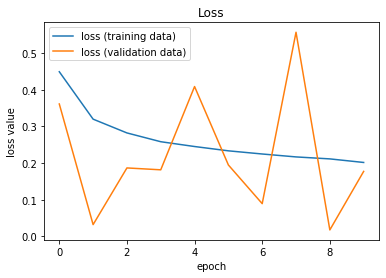

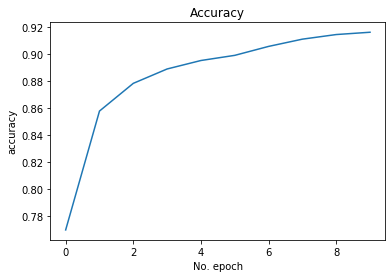

In [24]:
plt.plot(history.history['loss'], label='loss (training data)')
plt.plot(history.history['val_loss'], label='loss (validation data)')
plt.title('Loss')
plt.ylabel('loss value')
plt.xlabel('epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('No. epoch')
plt.show()

### Test function

In [59]:
from keras.preprocessing.image import load_img, img_to_array

decode = {0: 'cat', 1: 'dog'}

def inference(file):
    img = mpimg.imread(file)
    plt.imshow(img)
    plt.show()
    image = load_img(file, target_size=(150, 150))
    image = img_to_array(image)/255
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    yhat = model.predict_proba(image)
    score = yhat[0]
    yhat_vgg = model_vgg.predict_proba(image)
    yhat_res = model_res.predict_proba(image)
    print("base model : ", yhat, " ", decode[round(yhat[0][0])])
    print("vgg model : ", yhat_vgg, " ", decode[round(yhat_vgg[0][0])])
    print("Res model : ", yhat_res, " ", decode[round(yhat_res[0][0])])


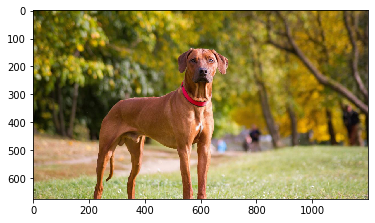

base model :  [[0.9998387]]   dog
vgg model :  [[0.95230675]]   dog
Res model :  [[1.]]   dog


In [60]:
inference('./personal/dog_1.jpg')

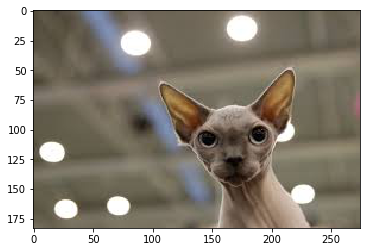

base model :  [[0.9999995]]   dog
vgg model :  [[0.26474932]]   cat
Res model :  [[0.9999738]]   dog


In [61]:
inference('./personal/cat_1.jpg')

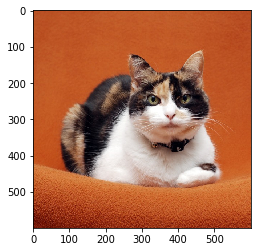

base model :  [[0.01078458]]   cat
vgg model :  [[0.01731887]]   cat
Res model :  [[0.]]   cat


In [62]:
inference('./personal/cat_2.jpg')

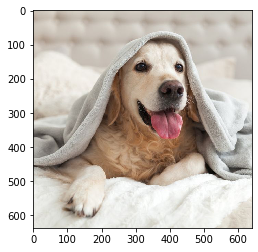

base model :  [[0.9996158]]   dog
vgg model :  [[0.9999324]]   dog
Res model :  [[1.]]   dog


In [63]:
inference('./personal/dog_2.jpg')

## Conclusion
pretrained yields better accuracy on the expense of more parameters as the original network is trained for general classification purpose.
but in few epochs a simple network with few conv layers was able to achieve 84% which is not bad considering that the model is not deep, but with more epochs it will be able to achieve better result.
InceptionResNetV2 is significally better in accuracy than vgg, but the odd thing is vgg was able to correctly classify cat_1.jpg although it can be ambigous for networks as this breed is quite different from other cat breeds. Further testing with ambigous pics is required